In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot data, visualizations
import seaborn as sns


from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn import metrics  # For metrics like silhouette coefficient
from sklearn.cluster import KMeans, AgglomerativeClustering #For clustering

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import sys
import os
print(os.listdir("D:\DataScience@DKB"))

# Any results you write to the current directory are saved as output.

['Clustering_IRIS.ipynb', 'Clustering_IRIS_Data.ipynb', 'ClustHW_Iris.txt', 'Einsteiger-Kurs 2.pdf', 'Iris.csv', 'Rolling_Dice_LoLN.ipynb']


In [2]:
#load iris data and print first 5 rows
df = pd.read_csv('D:\DataScience@DKB/Iris.csv')
#adjust data to process (obejct to float64)
df['Sepal.Width'] = pd.to_numeric(df['Sepal.Width'].str.replace(',','.'))
df['Sepal.Length'] = pd.to_numeric(df['Sepal.Length'].str.replace(',','.'))
df['Petal.Width'] = pd.to_numeric(df['Petal.Width'].str.replace(',','.'))
df['Petal.Length'] = pd.to_numeric(df['Petal.Length'].str.replace(',','.'))
print(df.head(5))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
#show basic statistics
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#show data types
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

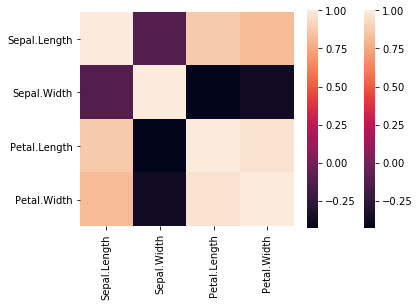

In [6]:
#make correlation heatmap using seaborn lib
#subset the data
df1 = df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
#print(df1)
#calculate correlations between dimensions
cor = df1.corr()
#print(cor)
#print(sns.__version__)
#show heatmap with correlations
sns.heatmap(cor, square = True)
plt.show()

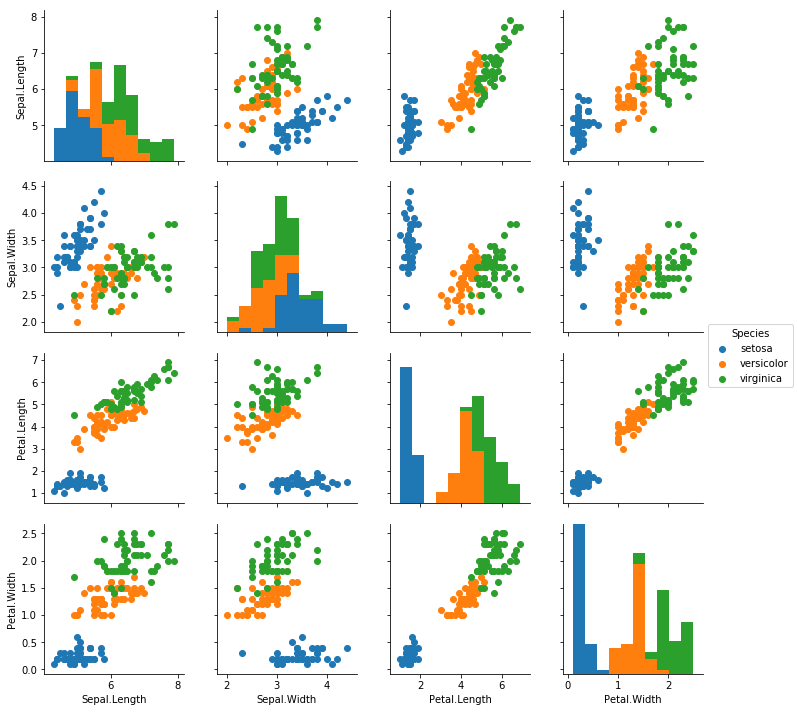

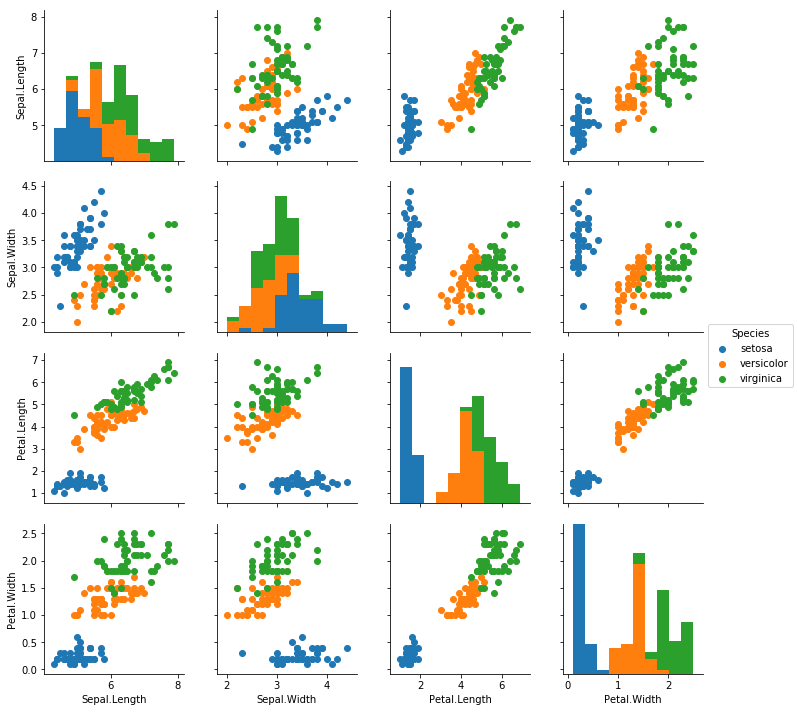

In [8]:
#plot pairwise relationships in a dataset
g = sns.PairGrid(df, hue='Species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [9]:
#scaling/normalize the data
scaler = StandardScaler()
sc_data = scaler.fit_transform(df1)
print(sc_data.shape)
#print(sc_data)

(150, 4)


In [10]:
#K-Means Clustering: define number of clusters with elbow criteria
k_cluster = range(1,10)
k_cluster_err = []

for num_clusters in k_cluster:
    clusters = KMeans(num_clusters)
    clusters.fit(sc_data)
    k_cluster_err.append(clusters.inertia_) #calculate sum of squared distance


In [11]:
#save results in dataframe
clusters_elb_df = pd.DataFrame({'k_cluster': k_cluster, 'k_cluster_err_WCSS': k_cluster_err})
print(clusters_elb_df)

   k_cluster  k_cluster_err_WCSS
0          1          600.000000
1          2          222.361705
2          3          139.820496
3          4          114.092238
4          5           90.807592
5          6           81.624661
6          7           71.808899
7          8           62.535792
8          9           55.108424


In [12]:
#plot elbow criteria
plt.figure(figsize=(15,8))
plt.xlabel('number of clusters K')
plt.ylabel('WCSS (within cluster sum of squares)')
plt.plot(clusters_elb_df.k_cluster, clusters_elb_df.k_cluster_err_WCSS, marker='x')

In [13]:
#K-Means Clustering: define number of clusters with silhouette coefficient (and adjusted rand score: measures the similarity between true labels and predicted labels)
k_cluster = range(2,10)
k_cluster_sil = []
k_cluster_ars = []

for num_clusters in k_cluster:
    clusters = KMeans(num_clusters, random_state=1)
    clusters.fit(sc_data)
    labels = clusters.labels_
    k_cluster_sil.append(metrics.silhouette_score(sc_data, labels, metric='euclidean'))
    k_cluster_ars.append(metrics.adjusted_rand_score(df['Species'],labels))
    

In [14]:
#save results in dataframe
clusters_sil_df = pd.DataFrame({'k_cluster': k_cluster, 'k_cluster_sil': k_cluster_sil, 'k_cluster_ars': k_cluster_ars})
print(clusters_sil_df)

   k_cluster  k_cluster_ars  k_cluster_sil
0          2       0.568116       0.581750
1          3       0.620135       0.459948
2          4       0.494535       0.385045
3          5       0.426377       0.343808
4          6       0.469261       0.318180
5          7       0.300266       0.324561
6          8       0.413577       0.334362
7          9       0.302223       0.339366


In [17]:
#K-Means Clustering
k_cluster = 3
kmeans_model = KMeans(n_clusters=k_cluster, random_state=10)
kmeans_model.fit(sc_data)

centroids = kmeans_model.cluster_centers_
labels = kmeans_model.predict(sc_data)

kmeans = pd.DataFrame(labels)

#add kmeans clusters to iris dataset
#df.insert((df.shape[1]),'kmeans',kmeans)

print('centroids: ' + str(centroids))
print(labels)
print(df.head(5))
print(df.tail(5))

#plt.scatter(sc_data[:, 0], sc_data[:, 1], c=labels, s=30, cmap='viridis')
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)

#alternate way of visualizing the clusters
plt.scatter(sc_data[labels == 0, 0], sc_data[labels == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(sc_data[labels == 1, 0], sc_data[labels == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(sc_data[labels == 2, 0], sc_data[labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#plotting the centroids
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'black', label = 'Centroids')
#plot legend
plt.legend()











centroids: [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  kmeans
0           5.1          3.5           1.4          0.2  setosa       2
1           4.9          3.0           1.4          0.2  setosa       2
2           4.7          3.2           1.3          0.2  setosa       2
3           4.6          3.1           1.5          0.2  setosa       2
4           5.0          3.6           1.4          0.2  setosa       2
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  kmeans
145           6.7   

In [18]:
#target vs model labels
print(df.Species.value_counts())
print(df.kmeans.value_counts())

print(df[0:5])
print(df[50:55])
print(df[100:105])


setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64
0    53
2    50
1    47
Name: kmeans, dtype: int64
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  kmeans
0           5.1          3.5           1.4          0.2  setosa       2
1           4.9          3.0           1.4          0.2  setosa       2
2           4.7          3.2           1.3          0.2  setosa       2
3           4.6          3.1           1.5          0.2  setosa       2
4           5.0          3.6           1.4          0.2  setosa       2
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species  kmeans
50           7.0          3.2           4.7          1.4  versicolor       1
51           6.4          3.2           4.5          1.5  versicolor       1
52           6.9          3.1           4.9          1.5  versicolor       1
53           5.5          2.3           4.0          1.3  versicolor       0
54           6.5          2.8           4.6          